In [1]:
#Missing Values- Feature Engineering- Day 1

#Lifecycle of a Data Science Projects

#1.Data Collection Statergy ---> from company side,3rd party APi's,Surveys
#2.Feature Engineering ---> Handling Missing Values
#3.Feature Selection ---> Selecting the required features for model building
#4.Model Building ---> Desigining the model for our predictions
#5.Model Deployment ---> Deploying our model in production for end user usage.

#Why there are Missing values? Survey ----> "Depression Survey"

#1.They hesitate to put down the information
#2.Survey informations are not that valid
#3.Men--salary
#4.Women---age
#5.People may have died----NAN

#Data Science Projects---Dataset should be collected from multiple sources

#What are the different types of Missing Data?

#1.Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability 
#of being missing is the same for all the observations. When data is MCAR, there is absolutely no 
#relationship between the data missing and any other values, observed or missing, within the dataset. 
#In other words, those missing data points are a random subset of the data. There is nothing systematic
#going on that makes some data more likely to be missing than other.

import pandas as pd
df = pd.read_csv('E:/datafiles/titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [2]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [3]:
#The values related to both 'Age','Cabin' are having some relation so these never treated as MCAR
#The values related to 'Embarked' are not having any relation so these are treated as MCAR

df[df['Embarked'].isnull()]

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
61,62,"Icard, Miss. Amelie",1,female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,"Stone, Mrs. George Nelson (Martha Evelyn)",1,female,62.0,0,0,113572,80.0,B28,NaN,1


In [4]:
#2.Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship 
#between the data missing and any other values, observed or missing, within the dataset.

import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values

df['cabin_null'].mean()

0.7710437710437711

In [5]:
df['cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabin_null, Length: 891, dtype: int32

In [6]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'cabin_null'],
      dtype='object')

In [7]:
#Now we want to evaluate the mean of the missing values b/w people who have survived vs not_survived
#comparing cabin_null vs Survived
#show the null_values/missing_values diff b/w survived-1/not_survived-0 in survived column w.r.t cabin_null

df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [8]:
#3.Missing At Random(MAR)
#Missing at Random, MAR, means there is a systematic relationship between the propensity of missing values
#and the observed data, but not the missing data. Whether an observation is missing has nothing to do with
#the missing values, but it does have to do with the values of an individual's observed variables.

#we mean that the missingness is to do with the person but can be predicted from other information about
#the person. It is not specifically related to the missing information. For example, if a child does not
#attend an educational assessment because the child is (genuinely) ill, this might be predictable from 
#other data we have about the child’s health, but it would not be related to what we would have measured
#had the child not been ill.

#1.Men---hide their salary
#2.Women---hide their age

In [9]:
# All the techniques of handling ,continuous missing values

#1. Mean/ Median/Mode Imputation/replacement
#2. Random Sample Imputation
#3. Capturing NAN values with a new feature
#4. End of Distribution imputation
#5. Arbitrary value imputation

In [10]:
#1.Mean/ Median /Mode imputation

#When should we apply? Mean/median/mode imputation has the assumption that the data is missing completely  
#at random(MCAR).We solve this by replacing the NAN with the most frequent occurance of the variables

df = pd.read_csv('E:/datafiles/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [11]:
# Lets go and see the percentage of missing values

df.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [12]:
#Now create a function to calculate the median for the specified column in dataset

def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [13]:
#To calculate the median for the Age column

median=df.Age.median()
median

28.0

In [14]:
#Now we are replacing all the NAN values in Age column with median

impute_nan(df,'Age',median)
df.head()

,Age,Fare,Survived,Age_median
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


In [15]:
#To compare whether the standard deviation of 'Age' and 'Age_median' have changed after imputation
#Imputation ----> Replacing the missing value with substituted value here i.e NAN with Median

print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


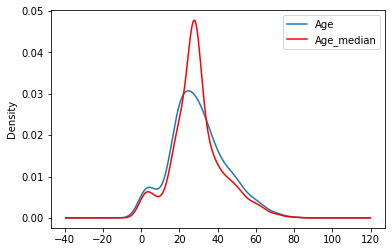

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [17]:
#Advantages And Disadvantages of Mean/Median Imputation

#Advantages:-
#1.Easy to implement(Robust to outliers)
#2.Faster way to obtain the complete dataset

# Disadvantages:-
#1.Change or Distortion in the original variance
#2.Impacts Correlation

#Note:- For categorical features we can apply the Mode over there

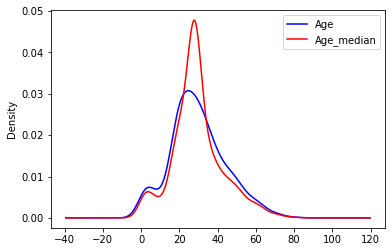

In [18]:
plt.figure()
df.Age.plot(kind='kde', color='blue', label='Age')
df.Age_median.plot(kind='kde', color='red', label='Age_median')
plt.legend()
plt.show()

In [19]:
#Missing Values- Feature Engineering- Day 2

#2.Random Sample Imputation

#Aim: Random sample imputation consists of taking random observation from the dataset and we use this 
#observation to replace the nan values

#When should it be used? It assumes that the data are missing completely at random(MCAR)

import pandas as pd
df=pd.read_csv('E:/datafiles/titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [20]:
#To know the sum of all null values present in the dataset

df.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [21]:
#To get the percentage of the null values

df.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [22]:
#To get the null values of individual column 'Age'

df['Age'].isnull().sum()

177

In [23]:
#To drop the nan values from 'Age' and again getting sample from the df['Age'].dropna() without Nan values
#The sample changes value constantly and will generate only one sample

df['Age'].dropna().sample()

843    34.5
Name: Age, dtype: float64

In [24]:
#This condition is replacing Nan values in 'Age' with some sample value,but this values changes frequently
#To hold this values constant to their index we have used random_state=0 to stop the changes in values
#If we use only sample df['Age'].dropna().sample() it will generate only one sample inorder to get this
#sample applied to all the nan values in 'Age' we are placing this df['Age'].isnull().sum(),random_state=0
#inside the sample to replace all the nan values in 'Age' with some sample value and using random_state=0
#to make sure the sample is constant 

df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [25]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [26]:
#Creating a function that replaces NAN values with a random sampling
#Created a variable+"_median" and filled the Nan value with median
#Created another variable+"_random" to store the random sample to fill nan

def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    
    ##It will have the random sample to fill the nan value
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [27]:
median=df.Age.median()
median

28.0

In [28]:
impute_nan(df,"Age",median)

In [29]:
df.head()

,Age,Fare,Survived,Age_median,Age_random
0,22.0,7.2500,0,22.0,22.0
1,38.0,71.2833,1,38.0,38.0
2,26.0,7.9250,1,26.0,26.0
3,35.0,53.1000,1,35.0,35.0
4,35.0,8.0500,0,35.0,35.0


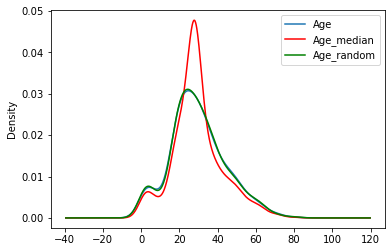

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [31]:
#Advantages:-
#1.Easy To implement
#2.There is less distortion in variance

#Disadvantage:-
#1.Every situation randomness wont work

In [32]:
#3.Capturing NAN values with a new feature
#It works well if the data are not Missing_Completely_At_Random[MCAR]/Missing_Not_At_Random [MNAR]

df=pd.read_csv('E:/datafiles/titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [33]:
#We are replacing the column 'Age' NaN values with a new feature i.e, 1 otherwise keep it as 0.
#i.e new_feature = NaN ---> 1 new_feature = Not_Nan ---> 0 

import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head()

,Age,Fare,Survived,Age_NAN
0,22.0,7.2500,0,0
1,38.0,71.2833,1,0
2,26.0,7.9250,1,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0


In [34]:
df.Age.median()

28.0

In [35]:
#Here we are replacing the nan value converted to 1 in Age with median 28 i.e,by 1 ---> 28

df['Age'].fillna(df.Age.median(),inplace=True)
df.head(30)

,Age,Fare,Survived,Age_NAN
0,22.0,7.2500,0,0
1,38.0,71.2833,1,0
2,26.0,7.9250,1,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0
5,28.0,8.4583,0,1
6,54.0,51.8625,0,0
7,2.0,21.0750,0,0
8,27.0,11.1333,1,0
9,14.0,30.0708,1,0


In [36]:
#Advantages:-
#1.Easy to implement
#2.Captures the importance of missing values

#Disadvantages:-
#1.Creating Additional Features(Curse of Dimensionality)

In [37]:
#4.End of Distribution imputation

#If there is suspicion that the missing value is not at random[MNAR] then capturing that information is 
#important.In this scenario, one would want to replace missing data with values that are at the tails
#of the distribution of the variable.

df=pd.read_csv('E:/datafiles/titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


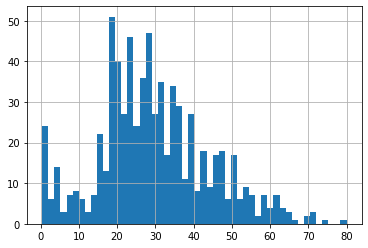

In [38]:
df.Age.hist(bins=50)

In [39]:
#Now we are going to pickup the data away at 3rd standard distribution into a variable i.e, 'extreme'

extreme = df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

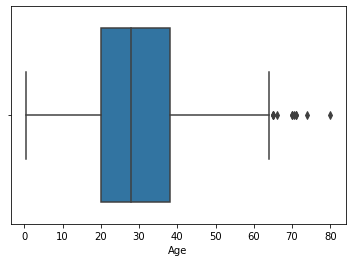

In [40]:
#We can able to see the outliers are present mostly at 70% to 80%

import seaborn as sns
sns.boxplot('Age',data=df)

In [41]:
#Here the impute_nan function is having 4 variables df,variable,median,extreme
#We are filling the nan values with extreme values into the variable+"_end_distribution
#We are filling the variable nan values with median i.e,'Age'--> Nan with median

def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace = True)

In [42]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [43]:
df.head()

,Age,Fare,Survived,Age_end_distribution
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


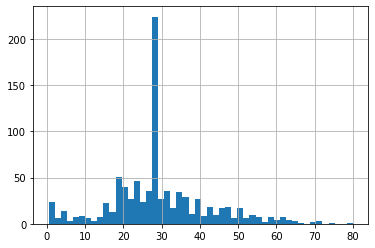

In [44]:
df['Age'].hist(bins=50)

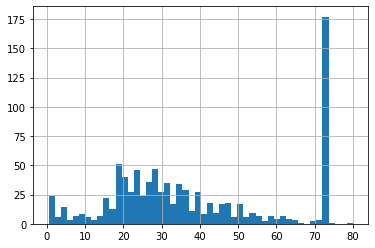

In [45]:
df['Age_end_distribution'].hist(bins=50)

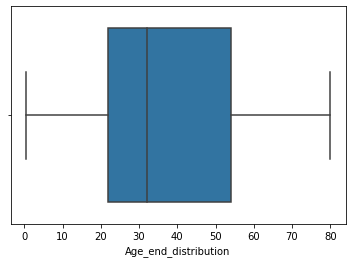

In [46]:
sns.boxplot('Age_end_distribution',data=df)

In [47]:
#Advantages:-
#1.Easy to implement
#2.Captures the importance of missingess if there is one

#Disadvantages:-
#1.Distorts the original distribution of the variable
#2.If missingess is not important, it may mask the predictive power of the original variable by distorting
#its distribution
#3.If the number of NaN is big,it will mask true outliers in the distribution
#4.If the number of NaN is small,the replaced NaN may be considered an outlier and pre-processed in a
#subsequent feature engineering

In [48]:
#Missing Values- Feature Engineering- Day 3

#5.Arbitrary value Imputation:-

#Assumptions:Data is Missing Not At random[MNAR]
#This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value.
#This method is suitable for numerical and categorical variables.

In [49]:
import pandas as pd

df=pd.read_csv("E:/datafiles/titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [50]:
#Using this impute_nan function we are using two variables to replace the Nan with arbitary values-'0'-'100'
#variable+'_zero' fills 'Age_zero' Nan value with '0' arbitrary value by creating new column
#variable+'_hundred' fills 'Age_hundred' Nan value with '100' arbitrary value by creating new column

def impute_nan(df,variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred'] = df[variable].fillna(100)

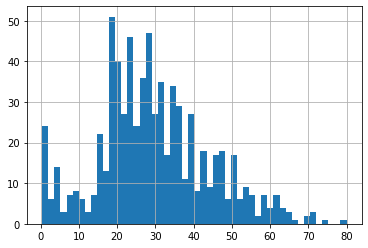

In [51]:
df['Age'].hist(bins=50)

In [52]:
impute_nan(df,'Age')

In [53]:
df.head(50)

,Age,Fare,Survived,Age_zero,Age_hundred
0,22.0,7.2500,0,22.0,22.0
1,38.0,71.2833,1,38.0,38.0
2,26.0,7.9250,1,26.0,26.0
3,35.0,53.1000,1,35.0,35.0
4,35.0,8.0500,0,35.0,35.0
5,NaN,8.4583,0,0.0,100.0
6,54.0,51.8625,0,54.0,54.0
7,2.0,21.0750,0,2.0,2.0
8,27.0,11.1333,1,27.0,27.0
9,14.0,30.0708,1,14.0,14.0


In [54]:
#Advantages:-
#1.Easy to implement.
#2.Captures the importance of missingess if there is one.
#Fast way of obtaining complete datasets.

#Disadvantages:-
#1.Distorts the original distribution of the variable
#2.If missingess is not important, it may mask the predictive power of the original variable by distorting
#its distribution
#3.Hard to decide which value to use

In [55]:
# All the techniques of handling , Categroical Missing Values

#1.Frequent Category Imputation
#2.Adding a variable to capture NAN

#1.Frequent Category Imputation

#This method is suitable for numerical and categorical variables, but in practice, we use this technique 
#with categorical variables.

#You can use this method when data is missing completely at random[MCAR], and no more than 5% of the 
#variable contains missing data.

import pandas as pd
df = pd.read_csv('E:/datafiles/loan.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [57]:
df = pd.read_csv('E:/datafiles/loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [58]:
df.shape

(1460, 4)

In [59]:
#To find the sum of null values in dataset

df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [60]:
#To sort the null values in ascending order in percentage

df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [61]:
#Compute the frequency with every feature
#From the above observation two features 'BsmtQual','GarageType' are having less number of missing values
#so we can replace them with the most frequent category that are available in the 'BsmtQual','GarageType'
#so this kind of most frequent categorical replacing of NaN values will not distort the features with the
#maximum number of cateogries with the features with less number of categries.

#df.groupby(['BsmtQual'])['BsmtQual'].count()
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

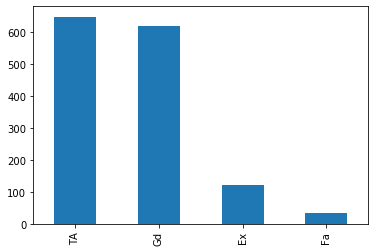

In [62]:
#df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()
df['BsmtQual'].value_counts().plot.bar()

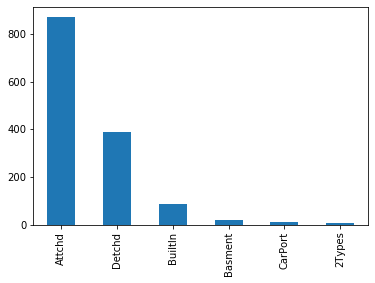

In [63]:
df['GarageType'].value_counts().plot.bar()

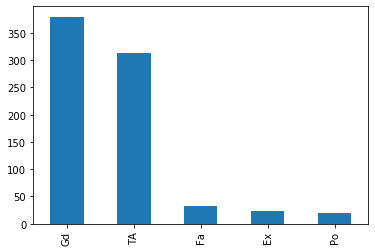

In [64]:
df['FireplaceQu'].value_counts().plot.bar()

In [65]:
#We are picking up the highest category index feature value from the particular variable.

df['GarageType'].value_counts().index[0]

'Attchd'

In [66]:
#This another approach to pick up the highest category index feature value from the particular variable.

df['GarageType'].mode()[0]

'Attchd'

In [67]:
# This function will fill/replace Nan value with the most_frequent_category feature

def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [68]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [69]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [70]:
#Advantages:-
#1.Easy To implement
#2.Faster way to implement and obtain dataset. 

#Disadvantages:-
#1.Since we are using the more frequent labels, it may use them in an over respresented way, if there are
#many nan's.
#2.It distorts the relation of the most frequent labels.

In [71]:
#2.1.Adding a variable to capture NAN

df=pd.read_csv('E:/datafiles/loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [72]:
#We are replacing the 'BsmtQual_Var' Null values with 1, and NotNull values with 0

import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [73]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [74]:
df['BsmtQual'].mode()[0]

'TA'

In [75]:
frequent = df['BsmtQual'].mode()[0]

In [76]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [77]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [78]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [79]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [80]:
#2.2.Suppose if you have more frequent categories, we just replace NAN with a new category

df=pd.read_csv('E:/datafiles/loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [81]:
#Creating a function with a variable+"newvar which will replace null value with "Missing" 
#If it is not null then return the actual variable

def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [82]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [83]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [84]:
#We are dropping the actual features after replacing NAN with a new category

df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


In [85]:
#Advantages:-
#1.Easy to implement.
#2.Fast way of obtaining complete datasets.
#3.It can be integrated into production.
#4.Captures the importance of “missingness”.
#5.No assumption made on the data.

#Disadvantages:-
#1.If the number of missing values is small, creating an additional category is just adding another rare
#label to the variable.